# Test Grafico

## Cargando Librerias

In [1]:
import scipy.io as sio
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from collections import Counter
import seaborn as sn
import os



from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras import optimizers


## definiendo rutas 

In [2]:
datasetPath = '../../Datasets/csv/Salinas.csv'
directorio="../../"
directorioModelos=directorio+"modelos/"
directorioPesos=directorio+"pesos/"
testPath='../../Datasets/csv/test/Salinas.csv'
base="Salinas"
numero_clases=17
pathResources="../../resources/"

bandas = 224 


## cargando datos

In [3]:
data  =  pd.read_csv(datasetPath)
testData= pd.read_csv(testPath)

## transformando

In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
#test
X_test = testData.iloc[:, :-1].values
y_test = testData.iloc[:, -1].values

### forma del conjunto de datos

In [5]:
print(">>X: ",X.shape)
print(">>y: ",y.shape)

print(">>X Test: ",X_test.shape)
print(">>y Test: ",y_test.shape)

>>X:  (111104, 224)
>>y:  (111104,)
>>X Test:  (33332, 224)
>>y Test:  (33332,)


### imprimiendo muestra

(512, 217)


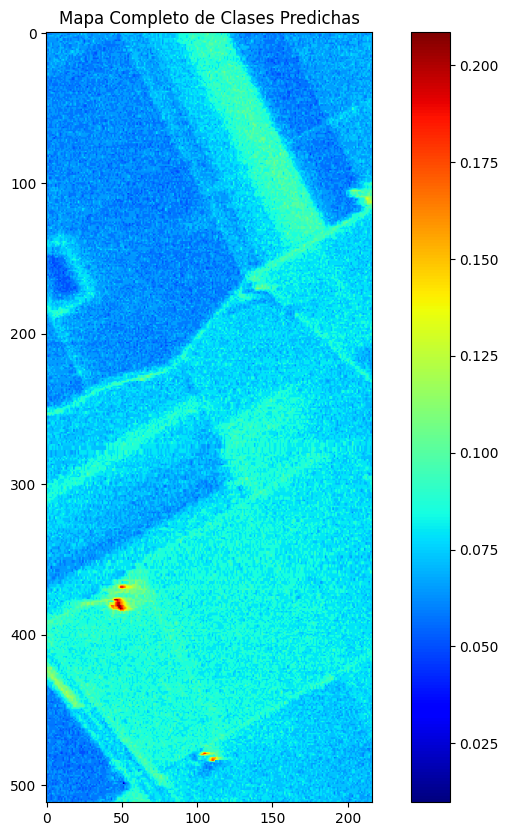

In [6]:
muestra=X[:,2:3]
muestra=muestra.reshape(512,217)
print(muestra.shape)
plt.figure(figsize=(10, 10))
plt.imshow(muestra, cmap='jet')
plt.colorbar()
plt.title('Mapa Completo de Clases Predichas')
plt.show()

## preprocesado de los datos (YA SE APLICO)

In [7]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

## definiendo modelos a leer

In [8]:
modelosYPesos = [
    (f"modeloC1{base}_ROS.h5", f"pesosC1{base}_ROS.weights.h5"),
    (f"modeloC1{base}_SMOTE.h5", f"pesosC1{base}_SMOTE.weights.h5"),
    (f"modeloC1{base}.h5", f"pesosC1{base}.weights.h5"),
    (f"modeloC2{base}_ROS.h5",f"pesosC2{base}_ROS.weights.h5"),
    (f"modeloC2{base}_SMOTE.h5",  f"pesosC2{base}_SMOTE.weights.h5"),
    (f"modeloC2{base}.h5", f"pesosC2{base}.weights.h5"),
    (f"modeloC3{base}_ROS.h5",f"pesosC3{base}_ROS.weights.h5"),
    (f"modeloC3{base}_SMOTE.h5", f"pesosC3{base}_SMOTE.weights.h5"),
    (f"modeloC3{base}.h5",f"pesosC3{base}.weights.h5"),
    (f"modeloC4{base}_ROS.h5", f"pesosC4{base}_ROS.weights.h5"),
    (f"modeloC4{base}_SMOTE.h5", f"pesosC4{base}_SMOTE.weights.h5"),
    (f"modeloC4{base}.h5", f"pesosC4{base}.weights.h5"),
    (f"modelo{base}_ROS.h5", f"pesos{base}_ROS.weights.h5"),
    (f"modelo{base}_SMOTE.h5",  f"pesos{base}_SMOTE.weights.h5"),
    (f"modelo{base}.h5",f"pesos{base}.weights.h5"),
]




In [9]:
models=[]
modelosArchivos=[]
for nameModel,nameWeight in modelosYPesos:
    modeloArchivo=directorioModelos+nameModel
    pesoArchivo=directorioPesos+nameWeight
    try:
        print(">>> Cargando modelo: ",modeloArchivo," con los pesos: ",pesoArchivo)  
        model = tf.keras.models.load_model(modeloArchivo)
        print(modeloArchivo," cargado")
        model.load_weights(pesoArchivo)
        print(pesoArchivo," cargado")
        ############################
        # Verificar si la última capa tiene #numero_clases# unidades
        if model.layers[-1].output_shape[-1] != numero_clases:
            print(f"Ajustando el modelo {modeloArchivo} para tener {numero_clases} clases.")
            # Crear un nuevo modelo con la misma arquitectura excepto la última capa
            capa_entrada = Input(shape=(bandas,))
            capa1 = Dense(50, activation='relu')(capa_entrada)
            capa2 = Dense(40, activation='relu')(capa1)
            capa3 = Dense(30, activation='relu')(capa2)
            capa4 = Dense(20, activation='relu')(capa3)
            capa_salida = Dense(numero_clases, activation='softmax')(capa4)
            model = Model(inputs=capa_entrada, outputs=capa_salida)
            model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])




        #######################
        models.append(model)
        modelosArchivos.append(modeloArchivo)    
    except Exception  as error:
        print(">>> Error: ",error)
        break
pesosArchivos=[]





>>> Cargando modelo:  ../../modelos/modeloC1Salinas_ROS.h5  con los pesos:  ../../pesos/pesosC1Salinas_ROS.weights.h5
../../modelos/modeloC1Salinas_ROS.h5  cargado
../../pesos/pesosC1Salinas_ROS.weights.h5  cargado
Ajustando el modelo ../../modelos/modeloC1Salinas_ROS.h5 para tener 17 clases.
>>> Cargando modelo:  ../../modelos/modeloC1Salinas_SMOTE.h5  con los pesos:  ../../pesos/pesosC1Salinas_SMOTE.weights.h5
../../modelos/modeloC1Salinas_SMOTE.h5  cargado
../../pesos/pesosC1Salinas_SMOTE.weights.h5  cargado
Ajustando el modelo ../../modelos/modeloC1Salinas_SMOTE.h5 para tener 17 clases.
>>> Cargando modelo:  ../../modelos/modeloC1Salinas.h5  con los pesos:  ../../pesos/pesosC1Salinas.weights.h5
../../modelos/modeloC1Salinas.h5  cargado
../../pesos/pesosC1Salinas.weights.h5  cargado
Ajustando el modelo ../../modelos/modeloC1Salinas.h5 para tener 17 clases.
>>> Cargando modelo:  ../../modelos/modeloC2Salinas_ROS.h5  con los pesos:  ../../pesos/pesosC2Salinas_ROS.weights.h5
../../mode

In [10]:
print(models)


[<keras.engine.functional.Functional object at 0x00000276EBF02A10>, <keras.engine.functional.Functional object at 0x00000276EBF1FC70>, <keras.engine.functional.Functional object at 0x00000276EBF48F40>, <keras.engine.functional.Functional object at 0x00000276EBF00C70>, <keras.engine.functional.Functional object at 0x00000276EBF70940>, <keras.engine.functional.Functional object at 0x00000276EBF9A530>, <keras.engine.functional.Functional object at 0x00000276EBFB7EE0>, <keras.engine.functional.Functional object at 0x00000276EBF37DF0>, <keras.engine.functional.Functional object at 0x00000277234577F0>, <keras.engine.functional.Functional object at 0x0000027723487640>, <keras.engine.functional.Functional object at 0x0000027723464070>, <keras.engine.functional.Functional object at 0x00000277234C3F40>, <keras.engine.functional.Functional object at 0x00000277234C0790>, <keras.engine.functional.Functional object at 0x00000277234E0F40>, <keras.engine.functional.Functional object at 0x00000277234CA

## Prediccion

1042/1042 [==============================] - 2s 2ms/step


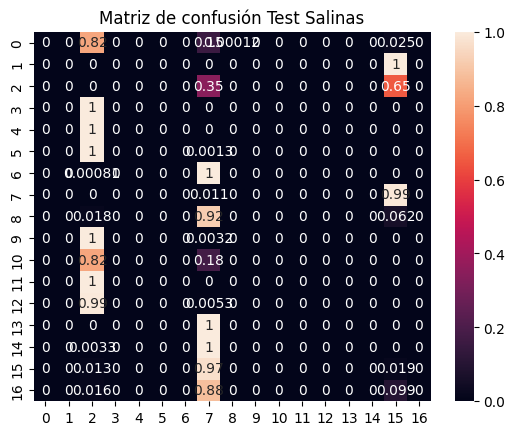

3472/3472 [==============================] - 8s 2ms/step


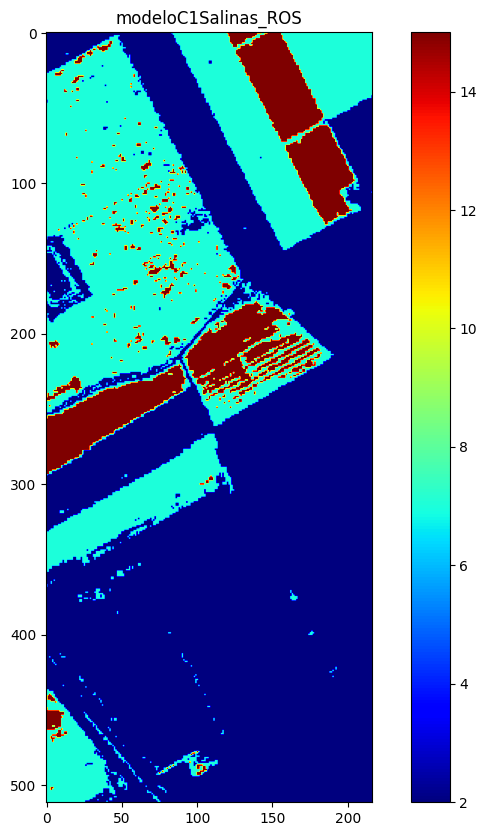

c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     16995
           1     0.0000    0.0000    0.0000       629
           2     0.0000    0.0000    0.0000      1118
           3     0.0000    0.0000    0.0000       631
           4     0.0000    0.0000    0.0000       416
           5     0.0000    0.0000    0.0000       788
           6     0.0000    0.0000    0.0000      1236
           7     0.0011    0.0110    0.0020      1092
           8     0.0000    0.0000    0.0000      3440
           9     0.0000    0.0000    0.0000      1885
          10     0.0000    0.0000    0.0000       950
          11     0.0000    0.0000    0.0000       336
          12     0.0000    0.0000    0.0000       567
          13     0.0000    0.0000    0.0000       278
          14     0.0000    0.0000    0.0000       302
          15     0.0126    0.0188    0.0151      2123
          16     0.0000    0.0000    0.0000       546

    accuracy              

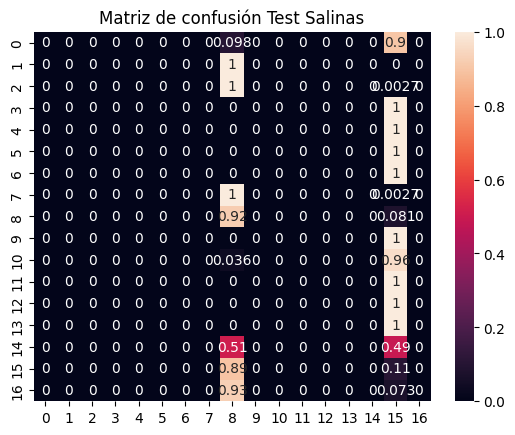

3472/3472 [==============================] - 8s 2ms/step


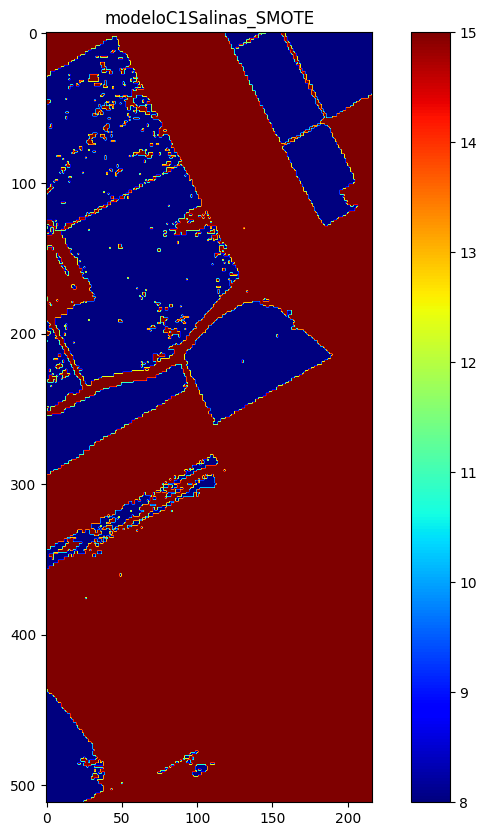

c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     16995
           1     0.0000    0.0000    0.0000       629
           2     0.0000    0.0000    0.0000      1118
           3     0.0000    0.0000    0.0000       631
           4     0.0000    0.0000    0.0000       416
           5     0.0000    0.0000    0.0000       788
           6     0.0000    0.0000    0.0000      1236
           7     0.0000    0.0000    0.0000      1092
           8     0.3083    0.9186    0.4617      3440
           9     0.0000    0.0000    0.0000      1885
          10     0.0000    0.0000    0.0000       950
          11     0.0000    0.0000    0.0000       336
          12     0.0000    0.0000    0.0000       567
          13     0.0000    0.0000    0.0000       278
          14     0.0000    0.0000    0.0000       302
          15     0.0097    0.1050    0.0177      2123
          16     0.0000    0.0000    0.0000       546

    accuracy              

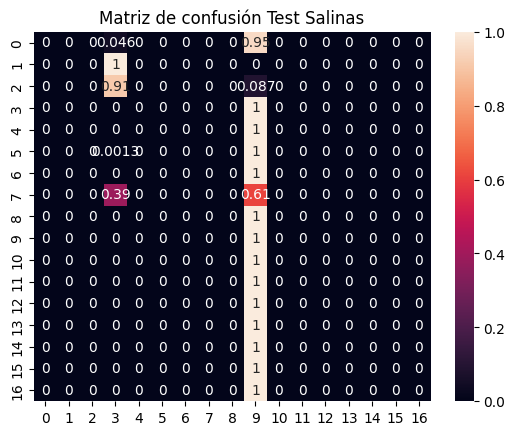

3472/3472 [==============================] - 8s 2ms/step


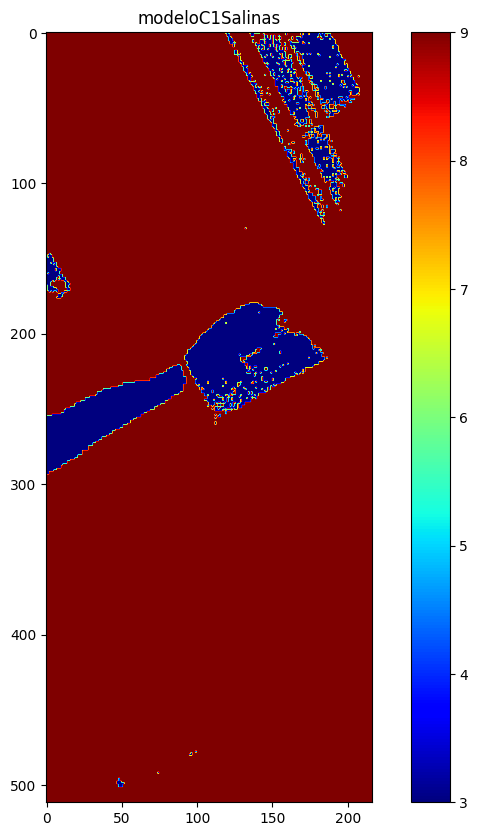

c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     16995
           1     0.0000    0.0000    0.0000       629
           2     0.0000    0.0000    0.0000      1118
           3     0.0000    0.0000    0.0000       631
           4     0.0000    0.0000    0.0000       416
           5     0.0000    0.0000    0.0000       788
           6     0.0000    0.0000    0.0000      1236
           7     0.0000    0.0000    0.0000      1092
           8     0.0000    0.0000    0.0000      3440
           9     0.0619    1.0000    0.1165      1885
          10     0.0000    0.0000    0.0000       950
          11     0.0000    0.0000    0.0000       336
          12     0.0000    0.0000    0.0000       567
          13     0.0000    0.0000    0.0000       278
          14     0.0000    0.0000    0.0000       302
          15     0.0000    0.0000    0.0000      2123
          16     0.0000    0.0000    0.0000       546

    accuracy              

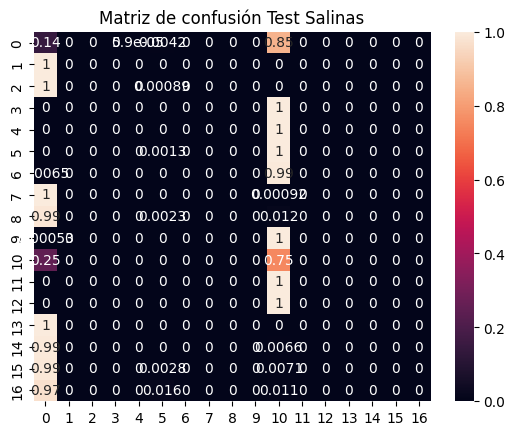

3472/3472 [==============================] - 8s 2ms/step


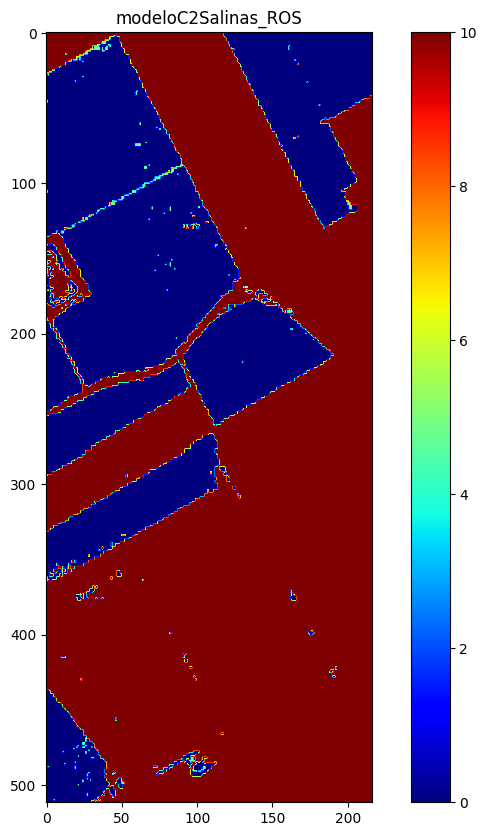

c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

              precision    recall  f1-score   support

           0     0.2014    0.1437    0.1677     16995
           1     0.0000    0.0000    0.0000       629
           2     0.0000    0.0000    0.0000      1118
           3     0.0000    0.0000    0.0000       631
           4     0.0000    0.0000    0.0000       416
           5     0.0104    0.0013    0.0023       788
           6     0.0000    0.0000    0.0000      1236
           7     0.0000    0.0000    0.0000      1092
           8     0.0000    0.0000    0.0000      3440
           9     0.0000    0.0000    0.0000      1885
          10     0.0338    0.7505    0.0646       950
          11     0.0000    0.0000    0.0000       336
          12     0.0000    0.0000    0.0000       567
          13     0.0000    0.0000    0.0000       278
          14     0.0000    0.0000    0.0000       302
          15     0.0000    0.0000    0.0000      2123
          16     0.0000    0.0000    0.0000       546

    accuracy              

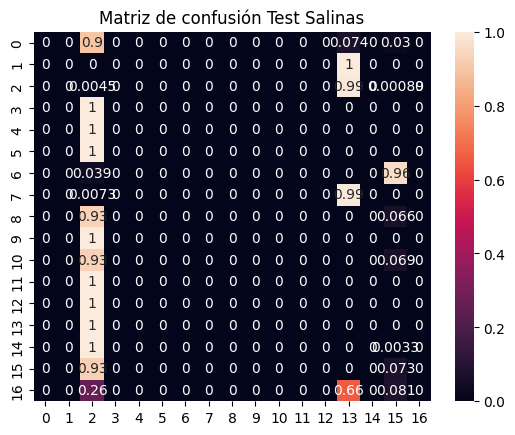

3472/3472 [==============================] - 8s 2ms/step


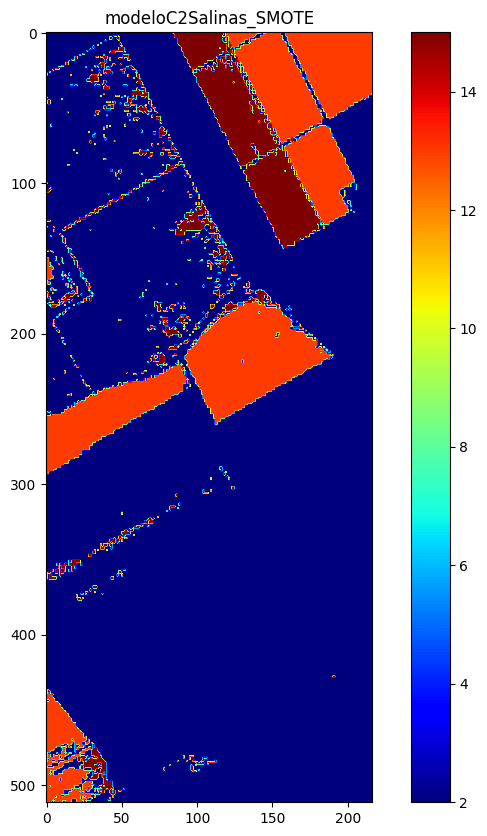

c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     16995
           1     0.0000    0.0000    0.0000       629
           2     0.0002    0.0045    0.0004      1118
           3     0.0000    0.0000    0.0000       631
           4     0.0000    0.0000    0.0000       416
           5     0.0000    0.0000    0.0000       788
           6     0.0000    0.0000    0.0000      1236
           7     0.0000    0.0000    0.0000      1092
           8     0.0000    0.0000    0.0000      3440
           9     0.0000    0.0000    0.0000      1885
          10     0.0000    0.0000    0.0000       950
          11     0.0000    0.0000    0.0000       336
          12     0.0000    0.0000    0.0000       567
          13     0.0000    0.0000    0.0000       278
          14     0.0000    0.0000    0.0000       302
          15     0.0703    0.0725    0.0714      2123
          16     0.0000    0.0000    0.0000       546

    accuracy              

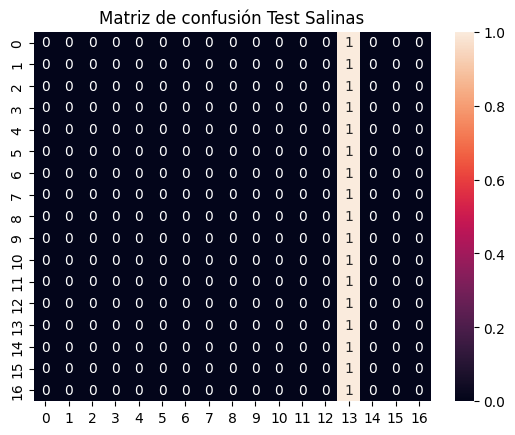

3472/3472 [==============================] - 8s 2ms/step


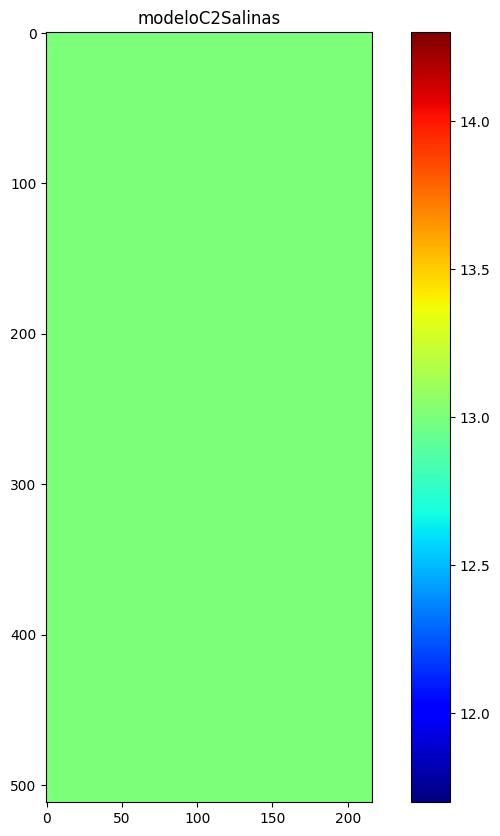

c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     16995
           1     0.0000    0.0000    0.0000       629
           2     0.0000    0.0000    0.0000      1118
           3     0.0000    0.0000    0.0000       631
           4     0.0000    0.0000    0.0000       416
           5     0.0000    0.0000    0.0000       788
           6     0.0000    0.0000    0.0000      1236
           7     0.0000    0.0000    0.0000      1092
           8     0.0000    0.0000    0.0000      3440
           9     0.0000    0.0000    0.0000      1885
          10     0.0000    0.0000    0.0000       950
          11     0.0000    0.0000    0.0000       336
          12     0.0000    0.0000    0.0000       567
          13     0.0083    1.0000    0.0165       278
          14     0.0000    0.0000    0.0000       302
          15     0.0000    0.0000    0.0000      2123
          16     0.0000    0.0000    0.0000       546

    accuracy              

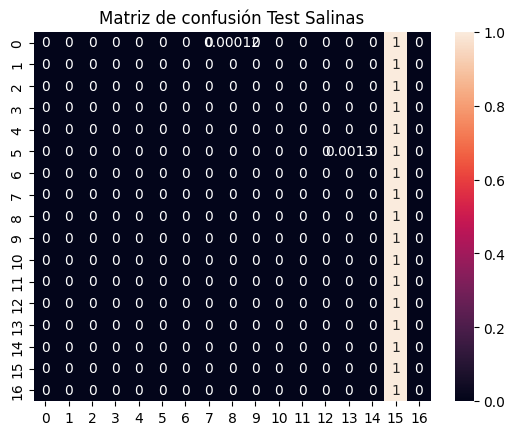

3472/3472 [==============================] - 8s 2ms/step


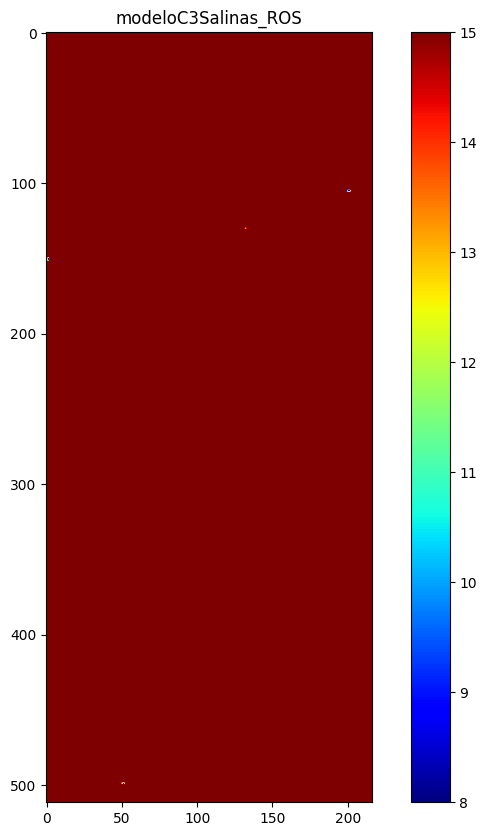

c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     16995
           1     0.0000    0.0000    0.0000       629
           2     0.0000    0.0000    0.0000      1118
           3     0.0000    0.0000    0.0000       631
           4     0.0000    0.0000    0.0000       416
           5     0.0000    0.0000    0.0000       788
           6     0.0000    0.0000    0.0000      1236
           7     0.0000    0.0000    0.0000      1092
           8     0.0000    0.0000    0.0000      3440
           9     0.0000    0.0000    0.0000      1885
          10     0.0000    0.0000    0.0000       950
          11     0.0000    0.0000    0.0000       336
          12     0.0000    0.0000    0.0000       567
          13     0.0000    0.0000    0.0000       278
          14     0.0000    0.0000    0.0000       302
          15     0.0637    1.0000    0.1198      2123
          16     0.0000    0.0000    0.0000       546

    accuracy              

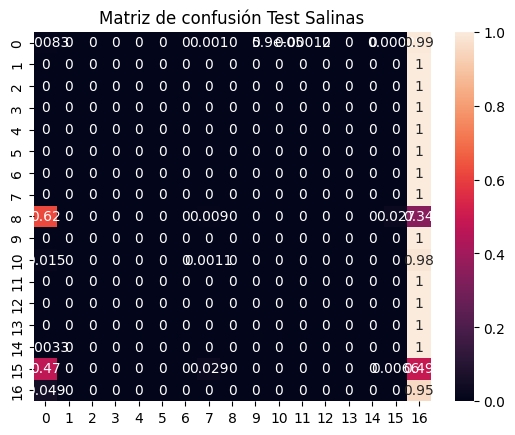

3472/3472 [==============================] - 8s 2ms/step


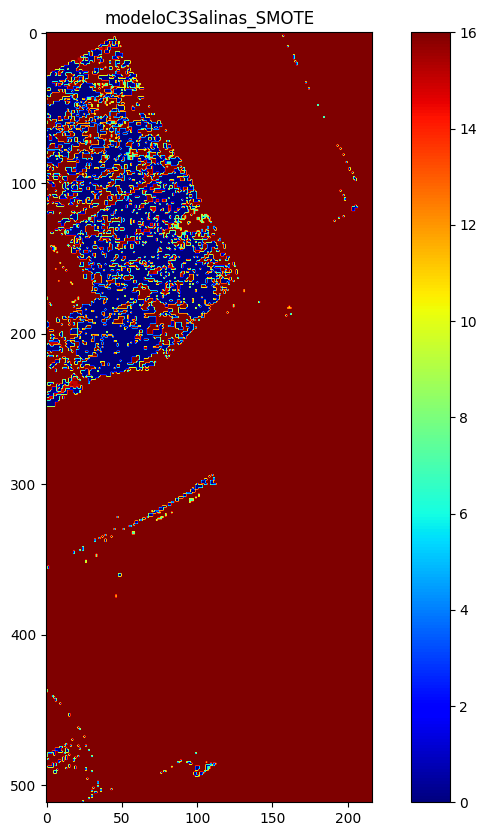

c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

              precision    recall  f1-score   support

           0     0.0425    0.0083    0.0139     16995
           1     0.0000    0.0000    0.0000       629
           2     0.0000    0.0000    0.0000      1118
           3     0.0000    0.0000    0.0000       631
           4     0.0000    0.0000    0.0000       416
           5     0.0000    0.0000    0.0000       788
           6     0.0000    0.0000    0.0000      1236
           7     0.0000    0.0000    0.0000      1092
           8     0.0000    0.0000    0.0000      3440
           9     0.0000    0.0000    0.0000      1885
          10     0.0000    0.0000    0.0000       950
          11     0.0000    0.0000    0.0000       336
          12     0.0000    0.0000    0.0000       567
          13     0.0000    0.0000    0.0000       278
          14     0.0000    0.0000    0.0000       302
          15     0.1261    0.0066    0.0125      2123
          16     0.0174    0.9505    0.0342       546

    accuracy              

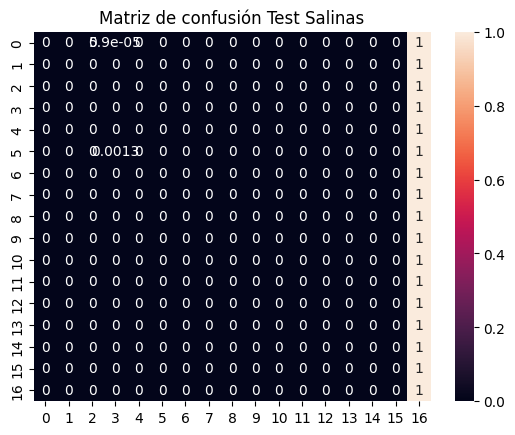

3472/3472 [==============================] - 8s 2ms/step


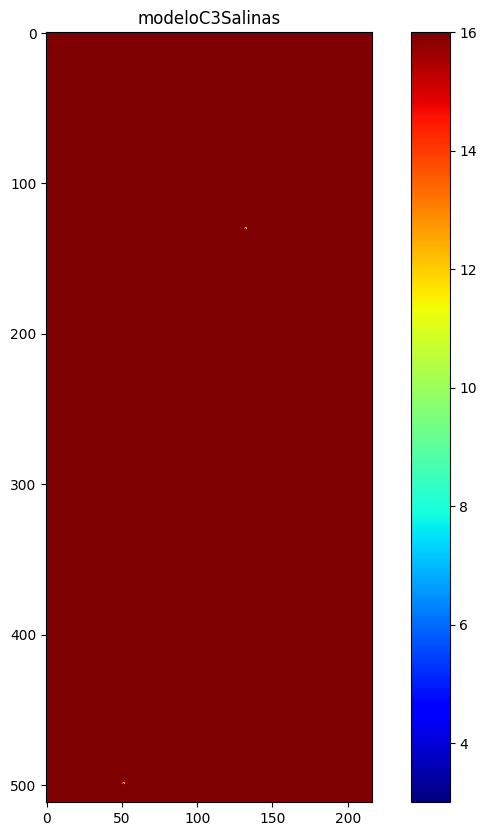

c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     16995
           1     0.0000    0.0000    0.0000       629
           2     0.0000    0.0000    0.0000      1118
           3     0.0000    0.0000    0.0000       631
           4     0.0000    0.0000    0.0000       416
           5     0.0000    0.0000    0.0000       788
           6     0.0000    0.0000    0.0000      1236
           7     0.0000    0.0000    0.0000      1092
           8     0.0000    0.0000    0.0000      3440
           9     0.0000    0.0000    0.0000      1885
          10     0.0000    0.0000    0.0000       950
          11     0.0000    0.0000    0.0000       336
          12     0.0000    0.0000    0.0000       567
          13     0.0000    0.0000    0.0000       278
          14     0.0000    0.0000    0.0000       302
          15     0.0000    0.0000    0.0000      2123
          16     0.0164    1.0000    0.0322       546

    accuracy              

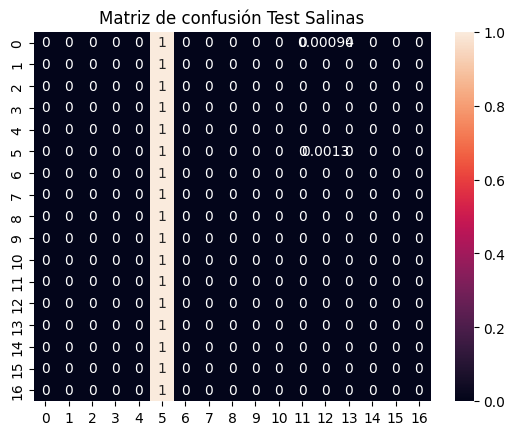

3472/3472 [==============================] - 8s 2ms/step


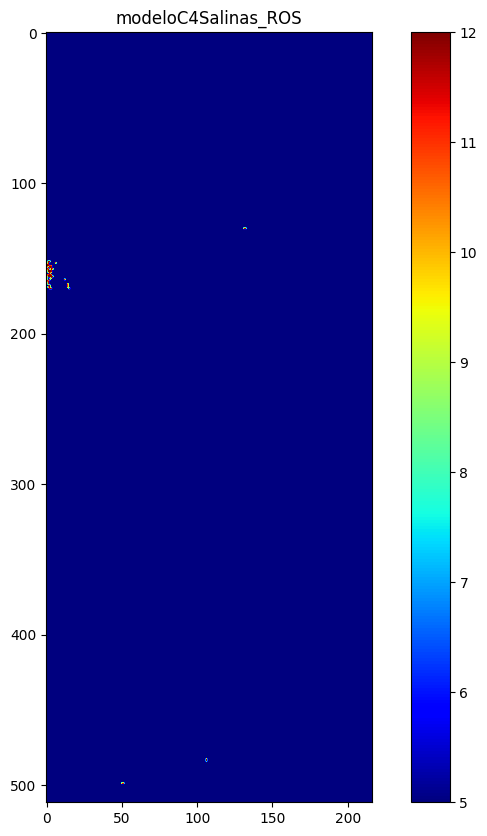

c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     16995
           1     0.0000    0.0000    0.0000       629
           2     0.0000    0.0000    0.0000      1118
           3     0.0000    0.0000    0.0000       631
           4     0.0000    0.0000    0.0000       416
           5     0.0236    0.9987    0.0462       788
           6     0.0000    0.0000    0.0000      1236
           7     0.0000    0.0000    0.0000      1092
           8     0.0000    0.0000    0.0000      3440
           9     0.0000    0.0000    0.0000      1885
          10     0.0000    0.0000    0.0000       950
          11     0.0000    0.0000    0.0000       336
          12     0.0000    0.0000    0.0000       567
          13     0.0000    0.0000    0.0000       278
          14     0.0000    0.0000    0.0000       302
          15     0.0000    0.0000    0.0000      2123
          16     0.0000    0.0000    0.0000       546

    accuracy              

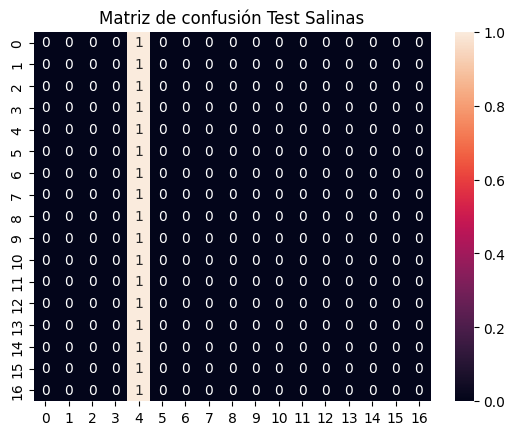

3472/3472 [==============================] - 7s 2ms/step


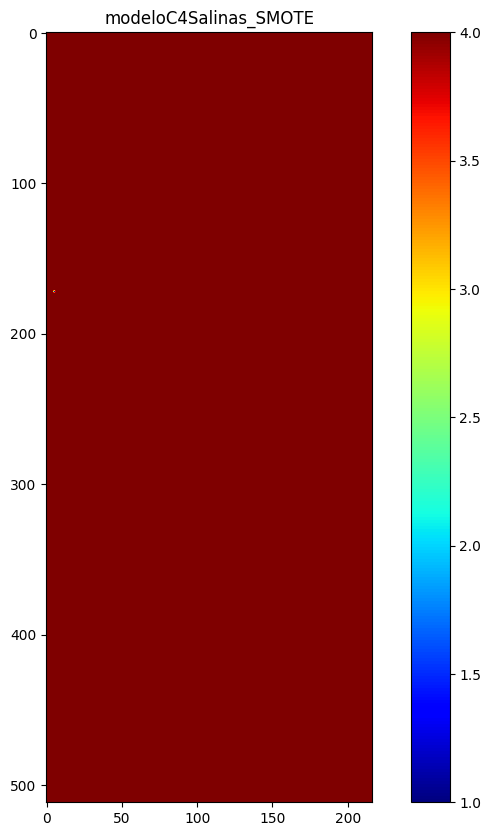

c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     16995
           1     0.0000    0.0000    0.0000       629
           2     0.0000    0.0000    0.0000      1118
           3     0.0000    0.0000    0.0000       631
           4     0.0125    1.0000    0.0247       416
           5     0.0000    0.0000    0.0000       788
           6     0.0000    0.0000    0.0000      1236
           7     0.0000    0.0000    0.0000      1092
           8     0.0000    0.0000    0.0000      3440
           9     0.0000    0.0000    0.0000      1885
          10     0.0000    0.0000    0.0000       950
          11     0.0000    0.0000    0.0000       336
          12     0.0000    0.0000    0.0000       567
          13     0.0000    0.0000    0.0000       278
          14     0.0000    0.0000    0.0000       302
          15     0.0000    0.0000    0.0000      2123
          16     0.0000    0.0000    0.0000       546

    accuracy              

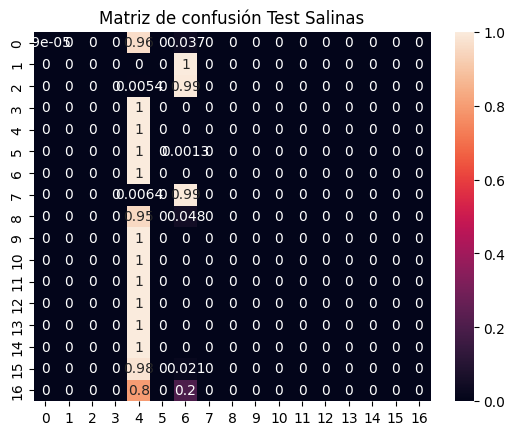

3472/3472 [==============================] - 7s 2ms/step


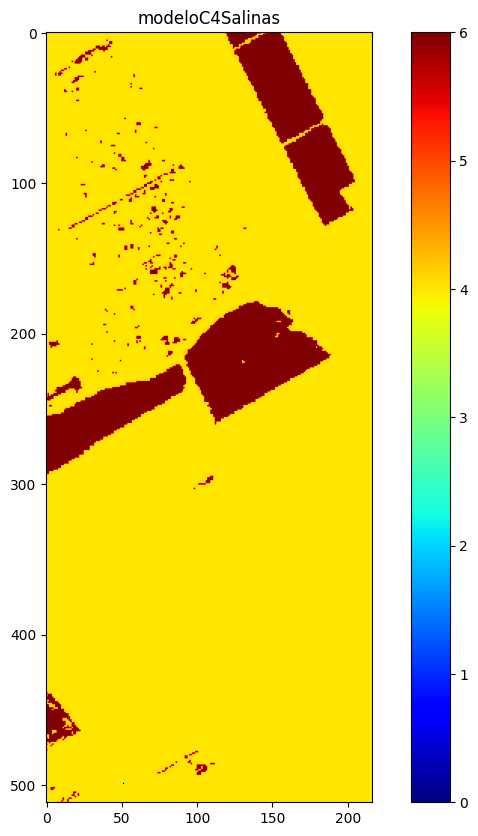

c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Daniel\anaconda3\envs\violence\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

              precision    recall  f1-score   support

           0     1.0000    0.0001    0.0001     16995
           1     0.0000    0.0000    0.0000       629
           2     0.0000    0.0000    0.0000      1118
           3     0.0000    0.0000    0.0000       631
           4     0.0141    1.0000    0.0278       416
           5     0.0000    0.0000    0.0000       788
           6     0.0000    0.0000    0.0000      1236
           7     0.0000    0.0000    0.0000      1092
           8     0.0000    0.0000    0.0000      3440
           9     0.0000    0.0000    0.0000      1885
          10     0.0000    0.0000    0.0000       950
          11     0.0000    0.0000    0.0000       336
          12     0.0000    0.0000    0.0000       567
          13     0.0000    0.0000    0.0000       278
          14     0.0000    0.0000    0.0000       302
          15     0.0000    0.0000    0.0000      2123
          16     0.0000    0.0000    0.0000       546

    accuracy              

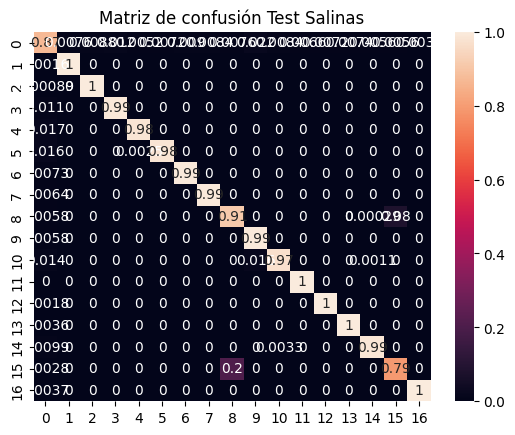

3472/3472 [==============================] - 7s 2ms/step


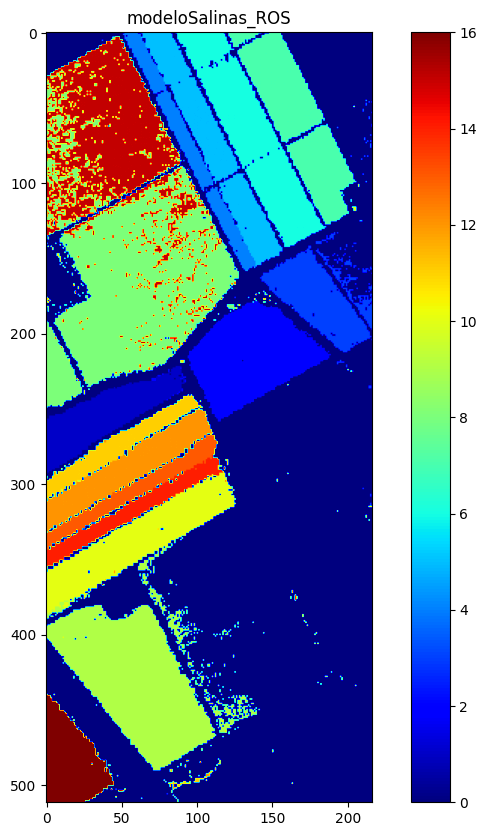

              precision    recall  f1-score   support

           0     0.9931    0.8680    0.9264     16995
           1     0.8285    0.9984    0.9056       629
           2     0.8816    0.9991    0.9367      1118
           3     0.7554    0.9889    0.8566       631
           4     0.8180    0.9832    0.8930       416
           5     0.8627    0.9810    0.9181       788
           6     0.8891    0.9927    0.9381      1236
           7     0.8836    0.9936    0.9353      1092
           8     0.8481    0.9140    0.8798      3440
           9     0.8296    0.9942    0.9044      1885
          10     0.8656    0.9695    0.9146       950
          11     0.7500    1.0000    0.8571       336
          12     0.8215    0.9982    0.9013       567
          13     0.6891    0.9964    0.8147       278
          14     0.7544    0.9868    0.8551       302
          15     0.8194    0.7927    0.8058      2123
          16     0.8992    0.9963    0.9453       546

    accuracy              

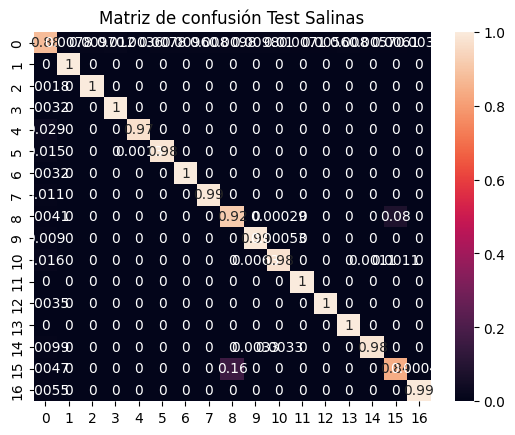

3472/3472 [==============================] - 7s 2ms/step


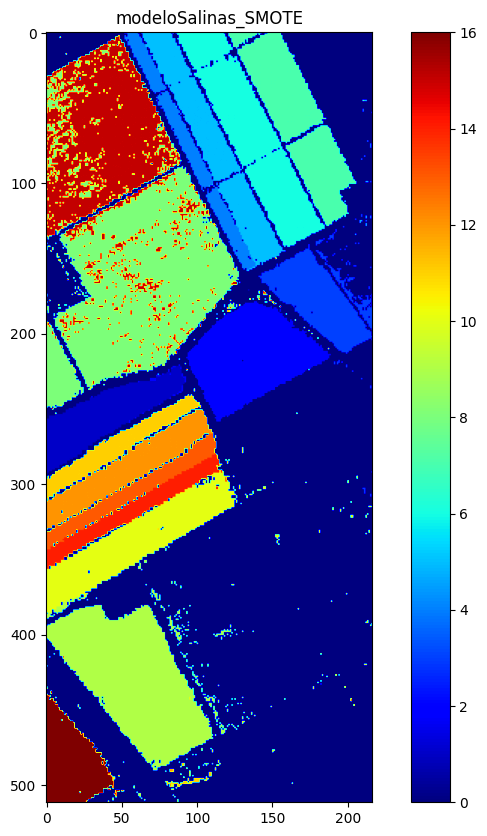

              precision    recall  f1-score   support

           0     0.9928    0.8751    0.9303     16995
           1     0.8265    1.0000    0.9050       629
           2     0.8712    0.9982    0.9304      1118
           3     0.7506    0.9968    0.8564       631
           4     0.8670    0.9712    0.9161       416
           5     0.8535    0.9835    0.9139       788
           6     0.8825    0.9968    0.9362      1236
           7     0.8882    0.9890    0.9359      1092
           8     0.8628    0.9160    0.8886      3440
           9     0.9152    0.9905    0.9513      1885
          10     0.8374    0.9758    0.9013       950
          11     0.7352    1.0000    0.8474       336
          12     0.8561    0.9965    0.9209       567
          13     0.6715    1.0000    0.8035       278
          14     0.7519    0.9834    0.8522       302
          15     0.8247    0.8375    0.8310      2123
          16     0.8990    0.9945    0.9443       546

    accuracy              

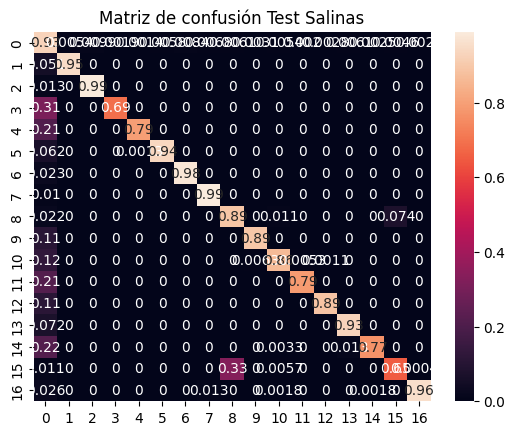

3472/3472 [==============================] - 7s 2ms/step


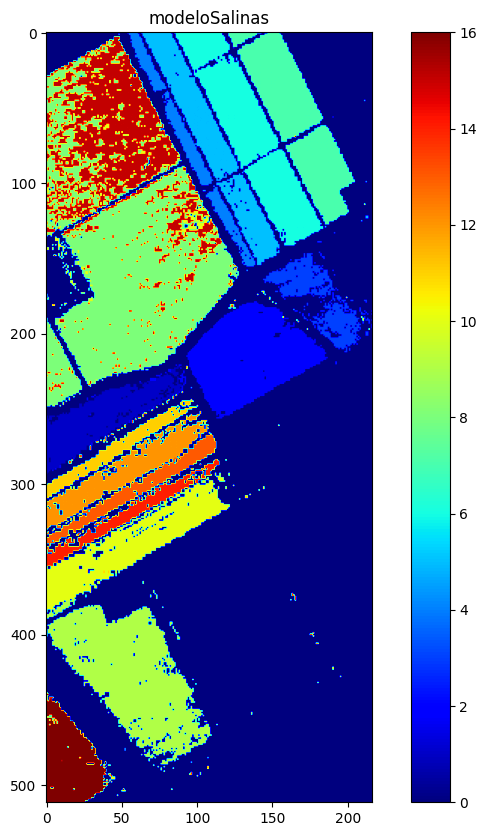

              precision    recall  f1-score   support

           0     0.9364    0.9252    0.9308     16995
           1     0.8677    0.9491    0.9066       629
           2     0.8672    0.9875    0.9235      1118
           3     0.9296    0.6910    0.7927       631
           4     0.9322    0.7933    0.8571       416
           5     0.8828    0.9365    0.9089       788
           6     0.8947    0.9765    0.9338      1236
           7     0.8986    0.9899    0.9420      1092
           8     0.7924    0.8919    0.8392      3440
           9     0.9667    0.8939    0.9289      1885
          10     0.8497    0.8632    0.8564       950
          11     0.8713    0.7857    0.8263       336
          12     0.9130    0.8889    0.9008       567
          13     0.7049    0.9281    0.8012       278
          14     0.8436    0.7682    0.8042       302
          15     0.8055    0.6533    0.7215      2123
          16     0.9175    0.9579    0.9373       546

    accuracy              

In [11]:
i=0
x2=X_test
y2=y_test
for model in models:
    # Evaluar el modelo y hacer predicciones
    evaluation = model.evaluate(X_test, y_test, verbose=1)
    snn_pred = model.predict(X_test)
    snn_predicted = np.argmax(snn_pred, axis=1)
    # Crear la matriz de confusión
    snn_cm = confusion_matrix(y_test, snn_predicted)
    snn_cmN = np.zeros((numero_clases, numero_clases))
    for j in range(numero_clases):
        total = np.sum(snn_cm[j]).astype(float)
        for k in range(numero_clases):
            snn_cmN[j][k] = snn_cm[j][k] / total


    nombreModelo=str(modelosArchivos[i].split("/")[3].split(".")[0])

    # Visualizar la matriz de confusión
    snn_df_cm = pd.DataFrame(snn_cmN, range(numero_clases), range(numero_clases))
    sn.heatmap(snn_df_cm, annot=True)
    plt.title(f"Matriz de confusión Test {base}")
    plt.savefig(pathResources+nombreModelo+".png", bbox_inches='tight')
    plt.show()
    plt.close()



  





    # Hacer predicciones en todo el conjunto de datos
    predictions = model.predict(X)
    predicted_classes = np.argmax(predictions, axis=1)
    predicted_map = predicted_classes.reshape(512, 217)
    plt.figure(figsize=(10, 10))
    plt.imshow(predicted_map, cmap='jet')
    plt.colorbar()
    
    plt.title(nombreModelo)
    plt.savefig(str(pathResources+nombreModelo  ))
    plt.show()
    plt.close()

    

    ##################
    snn_report1 = classification_report(y2, snn_predicted,digits=4)
    print(snn_report1)

    mult=1
    for ii in range(numero_clases):
        mult=mult*snn_cmN[ii][ii]
    error=np.power(mult,1/numero_clases)
    print(error)
    #se almacena la informacion 
    info=open(str(pathResources+str(nombreModelo)+'.txt'),'w')
    info.write(os.linesep)
    info.write(os.linesep)
    info.write(snn_report1)
    info.write(os.linesep)
    info.write(os.linesep)
    info.write(str(error))
    info.close()
    ##################

    












    i=i+1